In [9]:
# install sklearn and pandas
!pip install --user --upgrade pip -q
!pip install --user sklearn -q
!pip install --user pandas  -q
import pickle, sklearn

from ipywidgets import *
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spst

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


## Problem

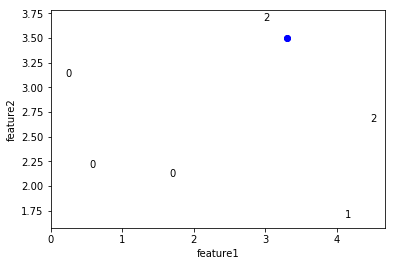

In [10]:
np.random.seed(6)
N=6
x1=np.random.rand(N)*5
x2=np.random.rand(N)*5
z=1
if z==1:
    y=(x1>2)*1
    y=y+(x2>2)*(x1>=2)*1
else:
    y=(x2>2)*1
    y=y+(x1>2)*(x2>=2)*1

DATA=pd.DataFrame({"x1":x1,"x2":x2,"label":y})

plt.plot(x1,x2, 'ro', alpha =0)

for i in range(4):
  for j in range(len(x1[y==i])):
    plt.text(x1[y==i][j],x2[y==i][j],str(i))
    plt.xlabel("feature1")
    plt.ylabel("feature2")
    plt.scatter([3.3],[3.5],color="blue",s=30)
        


In [11]:
DATA

,x1,x2,label
0,4.464301,2.649087,2
1,1.659899,2.094037,0
2,4.106146,1.677039,1
3,0.208483,3.112597,0
4,0.538283,2.190707,0
5,2.975260,3.679411,2


In [12]:
def gini_index(data):
    v, counts=np.unique(data,return_counts=True)
    return 1-np.sum((counts/np.sum(counts))**2)
    
def tree_gini_index(y,x,split,disp):
    cuts=(np.sort(x)[0:-1]+np.sort(x)[1:])/2
    seq=np.argsort(cuts)
    data1=y[x<=cuts[seq[split]]]
    data2=y[x>cuts[seq[split]]]
    G1=gini_index(data1)
    G2=gini_index(data2)
    Weighted_G=G1*len(data1)/len(y)+G2*len(data2)/len(y)
    if disp==True:
        print("Gini: <=Branch:", np.round(G1,3)," prediction:", spst.mode(data1)[0][0])
        print("Gini: >Branch:", np.round(G2,3)," prediction:", spst.mode(data2)[0][0])
        print("Gini: Weighted",np.round(Weighted_G,3))
        print("Gini: No Split",np.round(gini_index(y),3), " prediction:", spst.mode(y)[0][0])
    return Weighted_G



def MSE(data):
    prediction=np.mean(data)
    MSE_val=np.mean((data-prediction)**2)
    return MSE_val
    
def tree_MSE(y,x,split,disp):
    cuts=(np.sort(x)[0:-1]+np.sort(x)[1:])/2
    seq=np.argsort(cuts)
    data1=y[x<=cuts[seq[split]]]
    data2=y[x>cuts[seq[split]]]
    G1=MSE(data1)
    G2=MSE(data2)
    Weighted_G=G1*len(data1)/len(y)+G2*len(data2)/len(y)
    if disp==True:
        print("MSE: <=Branch:", np.round(G1,3)," prediction:", np.round(np.mean(data1),3) )
        print("MSE: >Branch:", np.round(G2,3)," prediction:", np.round(np.mean(data2),3) )
        print("MSE: Weighted",np.round(Weighted_G,3))
        print("MSE: No Split",np.round(MSE(y),3)," prediction:", np.round(np.mean(y),3) )
    return Weighted_G


def find_best(x1,x2,y,measure="MSE"):
    if measure=="gini":
        Gini0=gini_index(y)
        Gini1=[tree_gini_index(y,x1,split,False) for split in range(len(y)-1)]
        Gini2=[tree_gini_index(y,x2,split,False) for split in range(len(y)-1)]
        Gini1_min=np.min(Gini1)
        Gini2_min=np.min(Gini2)

        if Gini0<=min(Gini1_min,Gini2_min):
            return 0, None
        elif Gini1_min<Gini2_min:
            return 1, np.argmin(Gini1)
        else:
            return 2, np.argmin(Gini2)
    elif measure=="MSE":
        mse0=MSE(y)
        mse1=[tree_MSE(y,x1,split,False) for split in range(len(y)-1)]
        mse2=[tree_MSE(y,x2,split,False) for split in range(len(y)-1)]
        mse1_min=np.min(mse1)
        mse2_min=np.min(mse2)
        if mse0<=min(mse1_min,mse2_min):
            return 0, None
        elif mse1_min<mse2_min:
            return 1, np.argmin(mse1)
        else:
            return 2, np.argmin(mse2)
    else:
        print("not implemented yet")
        

## First split

In [13]:
output = Output()
def draw_tree_stage1(change):
    output.clear_output(wait=True)
    with output:
        plt.xlabel("feature1")
        plt.ylabel("feature2")
        plt.xlim(0,5)
        plt.ylim(-0.2,5)
        for i in range(4):
            for j in range(len(x1[y==i])):
                plt.text(x1[y==i][j]-0.1,x2[y==i][j]-0.2,str(i))
        splitv=split.value-1
        measurev=measure.value
        x1_s=np.sort(x1)
        x2_s=np.sort(x2)
        cuts1=(x1_s[0:-1:1]+x1_s[1:])/2
        cuts2=(x2_s[0:-1:1]+x2_s[1:])/2
        if feature.value=="Feature1":
            seq=np.argsort(cuts1)
            plt.vlines(cuts1[seq[splitv]],-0.2,5)
            if measurev=="gini":
                tree_gini_index(y,x1,splitv,True)    
            else:
                tree_MSE(y,x1,splitv,True)    

        elif  feature.value=="Feature2":
            seq=np.argsort(cuts2)
            plt.hlines(cuts2[seq[splitv]],0,5)
            if measurev=="gini":
                tree_gini_index(y,x2,splitv,True)
            else:
                tree_MSE(y,x2,splitv,True)
        else :
            F, AG=find_best(x1,x2,y,measurev)
            if F==0:
                print("No")
                print("Split")
                print("!")
                print("!")
            elif F==1:
                seq=np.argsort(cuts1)
                plt.vlines(cuts1[seq[AG]],-0.2,5)
                if measurev=="gini":
                    tree_gini_index(y,x1,AG,True)
                else:
                    tree_MSE(y,x1,AG,True)
            else:
                seq=np.argsort(cuts2)
                plt.hlines(cuts2[seq[AG]],-0.2,5)
                if measurev=="gini":
                    tree_gini_index(y,x2,AG,True)
                else:
                    tree_MSE(y,x2,AG,True)
    
        plt.show()
 
 
    
            
feature=Dropdown(options=['Feature1', 'Feature2',"Best"])       
split=IntSlider(min=1,max=len(y)-1,step=1,value=0)
measure=Dropdown(options=["gini","MSE"])
display(feature) 
display(split)
display(measure)

feature.observe(draw_tree_stage1,names="value")
measure.observe(draw_tree_stage1,names="value")
split.observe(draw_tree_stage1,"value")
display(output)
        
    
#interactive(draw_tree_stage1,feature=["Feature1", "Feature2", "Best"],split=IntSlider(min=0,max=8,step=1,value=0)) 

Dropdown(options=('Feature1', 'Feature2', 'Best'), value='Feature1')

IntSlider(value=1, max=5, min=1)

Dropdown(options=('gini', 'MSE'), value='gini')

Output()

## Second split

In [14]:
output = Output()
with output:
    plt.xlim(0,5)
    plt.ylim(-0.2,5)
    plt.xlabel("feature1")
    plt.ylabel("feature2")
    measurev=measure.value
    for i in range(4):
        for j in range(len(x1[y==i])):
            plt.text(x1[y==i][j]-0.1,x2[y==i][j]-0.1,str(i))
    F, AG=find_best(x1,x2,y,measure=measurev)
   
    print("")
    print("")
    print("")
    print("")
    
    x1_s=np.sort(x1)
    x2_s=np.sort(x2)
    cuts1=(x1_s[0:-1:1]+x1_s[1:])/2
    cuts2=(x2_s[0:-1:1]+x2_s[1:])/2
 
    seq1=np.argsort(cuts1)
    seq2=np.argsort(cuts2)
    
    
    if F==1:
        seq=np.argsort(x1)
        plt.vlines(cuts1[seq1[AG]],-0.2,5,color="blue")
    else:
        seq=np.argsort(x2)
        plt.hlines(cuts2[seq2[AG]],0,5,color="blue")
    
    plt.show()

def draw_tree_stage2(change):
    output.clear_output(wait=True)
    with output: 
        featurev=feature.value
        branchv=branch.value
        splitv=split.value-1
        measurev=measure.value
        plt.xlabel("feature1")
        plt.ylabel("feature2")
        plt.xlim(0,5)
        plt.ylim(-0.2,5)
        for i in range(4):
            for j in range(len(x1[y==i])):
                plt.text(x1[y==i][j]-0.1,x2[y==i][j]-0.1,str(i))
        F, AG=find_best(x1,x2,y,measure=measurev)
            
        x1_s=np.sort(x1)
        x2_s=np.sort(x2)
        cuts1=(x1_s[0:-1:1]+x1_s[1:])/2
        cuts2=(x2_s[0:-1:1]+x2_s[1:])/2

        seq1=np.argsort(cuts1)
        seq2=np.argsort(cuts2)
        if F==1:
             
            plt.vlines(cuts1[seq1[AG]],-0.2,5,color="blue")
 
            C1=x1<=x1[seq[AG]]
            C2=x1>x1[seq[AG]]
            Seg1=[y[C1],x1[C1],x2[C1]]
            Seg2=[y[C2],x1[C2],x2[C2]]
            if branchv=="left":
                split.max=sum(C1)-1
                splitv=split.value-1
                y_l,x1_l,x2_l=Seg1[0],Seg1[1],Seg1[2]
                x1l_s=np.sort(x1_l)
                x2l_s=np.sort(x2_l)
                cuts1l=(x1l_s[0:-1:1]+x1l_s[1:])/2
                cuts2l=(x2l_s[0:-1:1]+x2l_s[1:])/2
                seq1l=np.argsort(cuts1l)
                seq2l=np.argsort(cuts2l)
                
                if featurev=="Feature1":
                    plt.vlines(cuts1l[seq1l[splitv]],-0.2,5)
                    if measurev=="gini":
                        tree_gini_index(y_l,x1_l,splitv,True)
                    else:
                        tree_MSE(y_l,x1_l,splitv,True)
                elif  featurev=="Feature2":
      

                    plt.hlines(cuts2l[seq2l[splitv]],0,cuts1[seq1[AG]])
                    
                    if measurev=="gini":
                        tree_gini_index(y_l,x2_l,splitv,True)
                    else:
                        tree_MSE(y_l,x2_l,splitv,True)

                else :
                    F0, AG0=find_best(x1_l,x2_l,y_l,measure=measurev)
                    if F0==0:
                        print("No")
                        print("Split")
                        print("!")
                        print("!")
                    elif F0==1:
  
                        plt.vlines(cuts1l[seq1l[AG0]],-0.2,5)
                        if measurev=="gini":
                            tree_gini_index(y_l,x1_l,AG0,True)
                        else:
                            tree_MSE(y_l,x1_l,AG0,True)
  
                    else:
                        seq_l=np.argsort(x2_l)
                        plt.hlines(cuts2l[seq2l[AG0]],0,cuts1[seq1[AG]])
                        if measurev=="gini":
                            tree_gini_index(y_l,x2_l,AG0,True)
                        else:
                            tree_MSE(y_l,x2_l,AG0,True)
                    
            else:
                split.max=sum(C2)-1
                splitv=split.value-1

                y_l,x1_l,x2_l=Seg2[0],Seg2[1],Seg2[2]
                x1l_s=np.sort(x1_l)
                x2l_s=np.sort(x2_l)
                cuts1l=(x1l_s[0:-1:1]+x1l_s[1:])/2
                cuts2l=(x2l_s[0:-1:1]+x2l_s[1:])/2
                seq1l=np.argsort(cuts1l)
                seq2l=np.argsort(cuts2l)
                if featurev=="Feature1":
                    plt.vlines(cuts1l[seq1l[splitv]],-0.2,5)
                    
                    if measurev=="gini":
                        tree_gini_index(y_l,x1_l,splitv,True)
                    else:
                        tree_MSE(y_l,x1_l,splitv,True)
                    
                    
                elif  featurev=="Feature2":

                    plt.hlines(cuts2l[seq2l[splitv]],cuts1[seq1[AG]],5)
                    if measurev=="gini":
                        tree_gini_index(y_l,x2_l,splitv,True)
                    else:
                        tree_MSE(y_l,x2_l,splitv,True)
                else :
                    F0, AG0=find_best(x1_l,x2_l,y_l,measurev)
                    if F0==0:
                        print("No")
                        print("Split")
                        print("!")
                        print("!")
                    elif F0==1:
                        plt.vlines(cuts1l[seq1l[AG0]],-0.2,5)
                        if measurev=="gini":
                            tree_gini_index(y_l,x1_l,AG0,True)
                        else:
                            tree_MSE(y_l,x1_l,AG0,True)
                    else:
                        seq_l=np.argsort(x2_l)
                        plt.hlines(cuts2l[seq2l[AG0]],cuts1[seq1[AG]],5)
                        if measurev=="gini":
                            tree_gini_index(y_l,x2_l,AG0,True)
                        else:
                            tree_MSE(y_l,x2_l,AG0,True)
            plt.show()
        
        
        else:
            plt.hlines(cuts2[seq2[AG]],0,5,color="blue")
 
            C1=x2<=x2[seq[AG]]
            C2=x2>x2[seq[AG]]
            Seg1=[y[C1],x1[C1],x2[C1]]
            Seg2=[y[C2],x1[C2],x2[C2]]
        
            if branchv=="left":
                split.max=sum(C1)-1
                splitv=split.value-1

                y_l,x1_l,x2_l=Seg1[0],Seg1[1],Seg1[2]
                if featurev=="Feature1":
                    seq_l=np.argsort(x1_l)
                    plt.vlines(x1_l[seq_l[splitv]],-0.2,cuts2[seq2[AG]])
                    if measurev=="gini":
                        tree_gini_index(y_l,x1_l,splitv,True)
                    else:
                        tree_MSE(y_l,x1_l,splitv,True)
                     
                elif  featurev=="Feature2":
                    seq_l=np.argsort(x2_l)

                    plt.hlines(x2_l[seq_l[splitv]],0,5)
                    if measurev=="gini":
                        tree_gini_index(y_l,x2_l,splitv,True)
                    else:
                        tree_MSE(y_l,x2_l,splitv,True)
                else :
                    F0, AG0=find_best(x1_l,x2_l,y_l,measurev)
                    if F0==0:
                        print("No")
                        print("Split")
                        print("!")
                        print("!")
                    elif F0==1:
                        seq_l=np.argsort(x1_l)
                        plt.vlines(x1_l[seq_l[AG0]],-0.2,5)
                        if measurev=="gini":
                            tree_gini_index(y_l,x1_l,AG0,True)
                        else:
                            tree_MSE(y_l,x1_l,AG0,True)
                    else:
                        seq_l=np.argsort(x2_l)
                        plt.hlines(x2_l[seq_l[AG0]],0,cuts1[seq1[AG]])
                        if measurev=="gini":
                            tree_gini_index(y_l,x2_l,AG0,True)
                        else:
                            tree_MSE(y_l,x2_l,AG0,True)
                    
            else:
                split.max=sum(C2)-1
                splitv=split.value-1

                y_l,x1_l,x2_l=Seg2[0],Seg2[1],Seg2[2]

                if featurev=="Feature1":
                    seq_l=np.argsort(x1_l)
                    plt.vlines(x1_l[seq_l[splitv]],cuts2[seq2[AG]],5)
                    if measurev=="gini":
                        tree_gini_index(y_l,x1_l,AG,True)
                    else:
                        tree_MSE(y_l,x1_l,AG,True)
                elif  featurev=="Feature2":
                    seq_l=np.argsort(x2_l)
                    plt.hlines(x2_l[seq_l[splitv]],0,5)
                    if measurev=="gini":
                        tree_gini_index(y_l,x2_l,AG,True)
                    else:
                        tree_MSE(y_l,x2_l,AG,True)
                else :
                    F0, AG0=find_best(x1_l,x2_l,y_l,measurev)
                    #print(F0,AG0)
                    if F0==0:
                        print("No")
                        print("Split")
                        print("!")
                        print("!")
                    elif F0==1:
                        seq_l=np.argsort(x1_l)
                        plt.vlines(x1_l[seq_l[AG0]],cuts2[seq1[AG]],5)
                        if measurev=="gini":
                            tree_gini_index(y_l,x1_l,AG0,True)
                        else:
                            tree_MSE(y_l,x1_l,AG0,True)
                    else:
                        seq_l=np.argsort(x2_l)
                        plt.hlines(x2_l[seq_l[AG0]],0,5)
                        if measurev=="gini":
                            tree_gini_index(y_l,x2_l,AG0,True)
                        else:
                            tree_MSE(y_l,x2_l,AG0,True)
            plt.show()

            
feature=Dropdown(options=['Feature1', 'Feature2',"Best"])    
branch=Dropdown(options=['left', "right"])    
split=IntSlider(min=1,max=len(y)-1,step=1,value=0)
measure=Dropdown(options=["gini","MSE"])

box1=HBox([branch, feature,measure,split])
 

display(box1) 


feature.observe(draw_tree_stage2,names="value")
branch.observe(draw_tree_stage2,names="value")
split.observe(draw_tree_stage2,"value")

 
measure.observe(draw_tree_stage2,names="value")
 
display(output)       

 

 
        
    


Output()